In [5]:
# importing necessary libraries
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pylab
from datetime import datetime
from statistics import mode
from mpl_toolkits.basemap import Basemap
import seaborn as sns

#%matplotlib inline
pylab.rcParams['figure.figsize'] = (10, 8)

In [6]:
# Uploading csv file for number of water advisories per province
advisory_df = pd.read_csv('Indigenous_advisory_province.csv')
advisory_df = advisory_df.rename(columns={'Number of Reserves':'Number of Reservations', 'Proportion of Reserves with Advisories':'Proportion of Reservations with Advisories'})
advisory_df

,Province,Number of Advisories,Number of Reservations,Proportion of Reservations with Advisories
0,Maritimes,7,33,0.212
1,Ontario,91,207,0.440
2,Manitoba,16,75,0.213
3,Saskatchewan,26,96,0.271
4,Alberta,4,97,0.041
5,British Columbia,20,201,0.100
6,Quebec,3,57,0.053
7,Northern Canada,0,38,0.000
8,Canada,194,804,0.241


In [7]:
# Uploading csv file for indigenous relative risk of colorectal cancer per province
rr_df = pd.read_csv('Indigenous_colorectal_cancer.csv')

# rename Colorectal column to province
rr_df = rr_df.rename(columns={'Colorectal ASIR':'Colorectal Relative Risk', 'Breast ASIR':'Breast Relative Risk', 'Prostate ASIR':'Prostate Relative Risk'})
rr_df = rr_df.drop('Unnamed: 4', axis = 'columns')

rr_df

,Province,Colorectal Relative Risk,Breast Relative Risk,Prostate Relative Risk
0,British Columbia,1.49,1.03,0.77
1,Alberta,1.16,0.98,0.80
2,Saskatchewan,1.08,0.84,0.59
3,Manitoba,1.09,0.71,0.76
4,Ontario,1.36,0.73,0.89
5,Quebec,0.95,0.73,0.82
6,Maritimes,1.12,0.98,1.11
7,Northern Canada,1.60,0.80,0.47
8,Canada,1.22,0.85,0.79


In [8]:
# merging the two dataframes
merged_df = pd.merge(advisory_df, rr_df, on='Province', how='outer')
merged_df

,Province,Number of Advisories,Number of Reservations,Proportion of Reservations with Advisories,Colorectal Relative Risk,Breast Relative Risk,Prostate Relative Risk
0,Maritimes,7,33,0.212,1.12,0.98,1.11
1,Ontario,91,207,0.440,1.36,0.73,0.89
2,Manitoba,16,75,0.213,1.09,0.71,0.76
3,Saskatchewan,26,96,0.271,1.08,0.84,0.59
4,Alberta,4,97,0.041,1.16,0.98,0.80
5,British Columbia,20,201,0.100,1.49,1.03,0.77
6,Quebec,3,57,0.053,0.95,0.73,0.82
7,Northern Canada,0,38,0.000,1.60,0.80,0.47
8,Canada,194,804,0.241,1.22,0.85,0.79


In [9]:
# filtering outliers
# adapted from QM2 workshop 9

def filter_outliers(var):
    q1 = var.quantile(0.25) # calculate the first quartile
    q3 = var.quantile(0.75) # calculate the third quartile
    iqr = q3 - q1 # calculate the interquartile range
    low = q1 - 3*iqr # calculate the lower bound
    high = q3 + 3*iqr # calculate the upper bound
    filtered = merged_df[(var > low) & (var < high)] # filter  the values that are within the bounds
    dropped_observations= len(var)-len(filtered) # calculate the number of observations that were dropped

    print('Dropped {} observations'.format(dropped_observations))
    return  filtered

merged_df=filter_outliers(merged_df['Colorectal Relative Risk']) # filter outliers from Colorectal relative risk
merged_df=filter_outliers(merged_df['Proportion of Reservations with Advisories']) # filter outliers from Proportion of reserves with Advisories

Dropped 0 observations
Dropped 0 observations


Text(51.47734027777777, 0.5, 'Proportion of Reservations with Advisories')

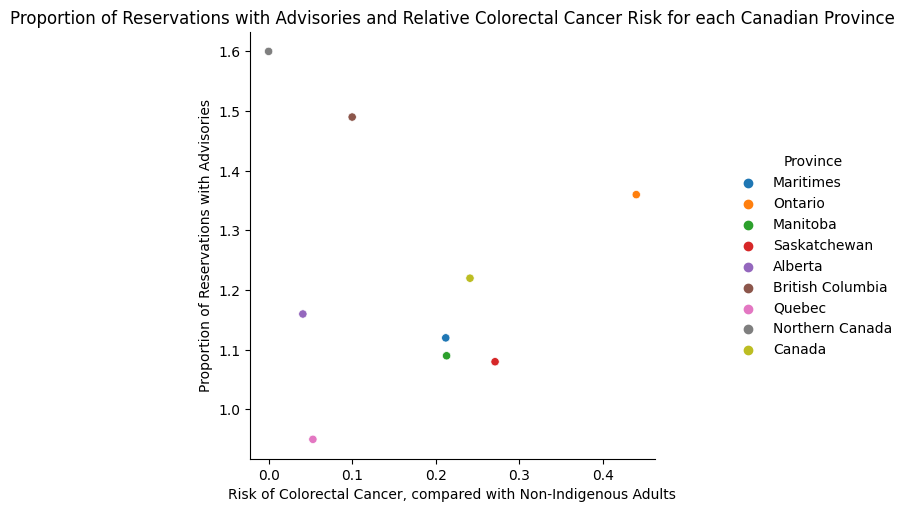

In [10]:
# plotting the proportion of reservations with advisories against the risk of colorectal cancer
# adapted from QM2 workshop 9

sns.relplot(data=merged_df, x='Proportion of Reservations with Advisories', y='Colorectal Relative Risk', hue='Province')
plt.title('Proportion of Reservations with Advisories and Relative Colorectal Cancer Risk for each Canadian Province')
plt.xlabel('Risk of Colorectal Cancer, compared with Non-Indigenous Adults')
plt.ylabel('Proportion of Reservations with Advisories')

Text(25.22222222222222, 0.5, 'Risk of Colorectal Cancer, compared with Non-Indigenous Adults')

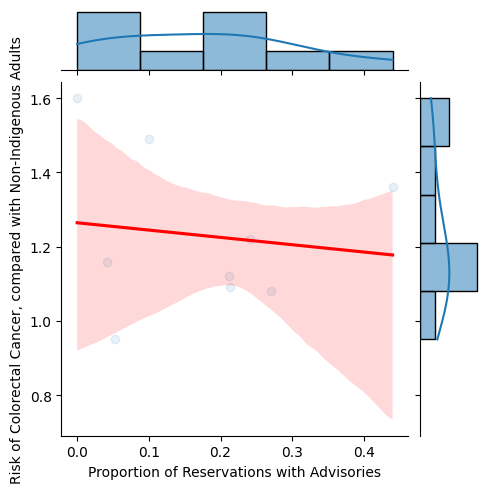

In [11]:
# checking homoscedasticity
# adapted from QM2 workshop 9

sns.jointplot(data=merged_df, # plot a scatterplot with a regression line and two histograms
                x='Proportion of Reservations with Advisories', # set the x axis to be the proportion of reservations with advisories
                y='Colorectal Relative Risk', # set the y axis to be the relative risk of colorectal cancer
                kind="reg",  # set the kind of plot to be a regression plot
                scatter_kws=dict(alpha=0.1), # set the transparency of the points to be 0.1 (10%)
                line_kws=dict(color='red'), # set the color of the regression line to red
                height=5) # set the height of the plot to be 5 inches 

plt.xlabel('Proportion of Reservations with Advisories') # add a label to the x axis
plt.ylabel('Risk of Colorectal Cancer, compared with Non-Indigenous Adults') # add a label to the y axis

/var/folders/xb/jsdnrww124zf5dldyly0tlnr0000gn/T/ipykernel_90566/699397426.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), # plot a correlation matrix


Text(0.5, 1.0, 'Correlation Matrix')

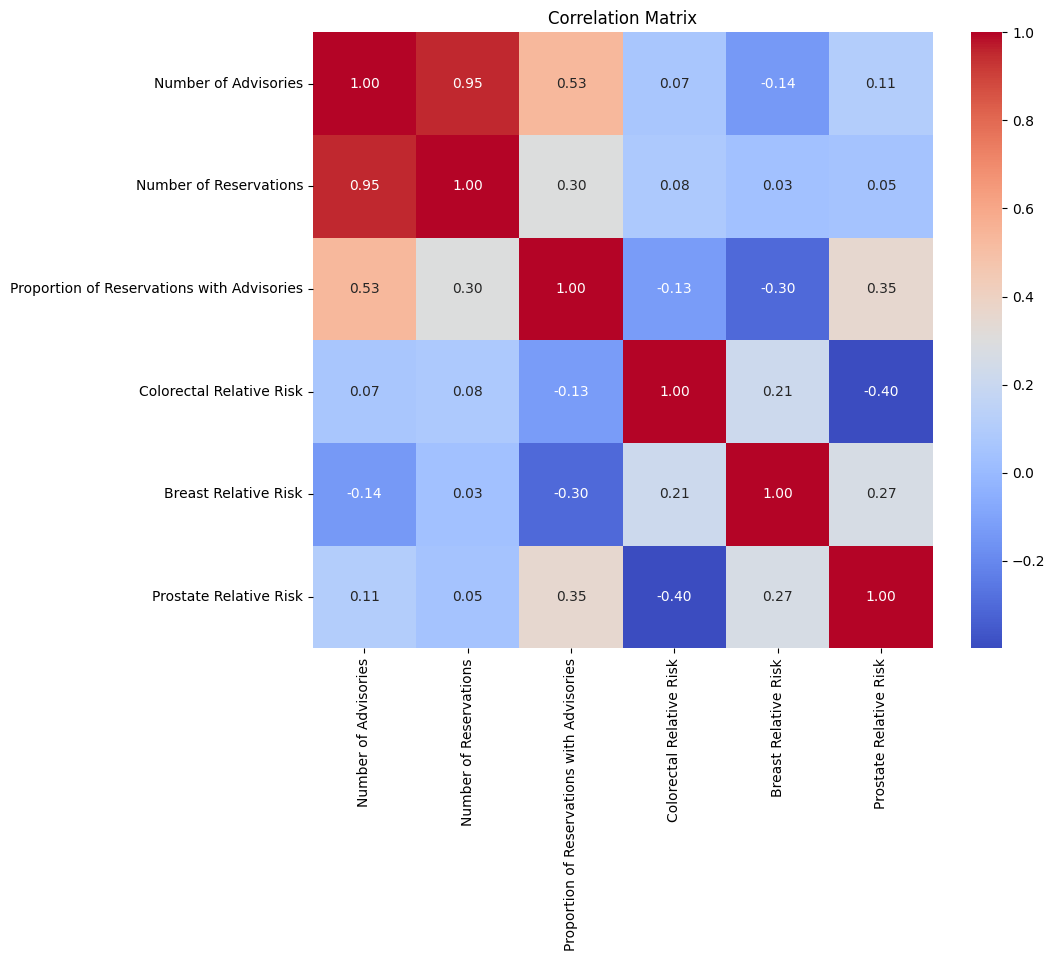

In [12]:
# checking for multicollinearity
# adapted from QM2 workshop 9

sns.heatmap(merged_df.corr(), # plot a correlation matrix 
            annot=True, # show the correlation values on the plot
            fmt=".2f", # set the format of the correlation values to be two decimal places
            cmap='coolwarm') # set the color palette to be coolwarm (blue for negative correlations, red for positive correlations)

plt.title('Correlation Matrix') # add a title

In [13]:
# calculating VIF
# adapted from QM2 workshop 9

from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, list_var_not_to_remove=None, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param list_var_not_to_remove: the list of variables that should not be removed even though it has a high VIF. For example, dummy (or indicator) variables represent a categorical variable with three or more categories.
    :param thresh: the max VIF value before the feature is removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const as const should not be removed
        vif_df = vif_df.drop('const')
        
        # drop the variables that should not be removed
        if list_var_not_to_remove is not None:
            vif_df = vif_df.drop(list_var_not_to_remove)
            
        print('Max VIF:', vif_df.VIF.max())
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df


ind_vars=['Proportion of Reservations with Advisories', 'Number of Reservations', 'Number of Advisories']

vif = drop_column_using_vif_(merged_df[ind_vars], thresh=5)
print("The columns remaining after VIF selection are:")
print(vif.columns)

Max VIF: 46.11617934519221
Dropping: Number of Advisories
Max VIF: 1.0959431990051243
The columns remaining after VIF selection are:
Index(['Proportion of Reservations with Advisories', 'Number of Reservations'], dtype='object')


In [14]:
# performing linear regression
# adapted from QM2 workshop 9

from statsmodels.formula.api import ols
from statsmodels.iolib.summary2 import summary_col

X=merged_df['Proportion of Reservations with Advisories']
Y=merged_df['Colorectal Relative Risk']

df = pd.DataFrame({'Proportion_of_Reservations_with_Advisories':X, 'y':Y})
model = ols('y~Proportion_of_Reservations_with_Advisories', data=df).fit()

print(model.summary()) # print the summary

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.124
Method:                 Least Squares   F-statistic:                    0.1201
Date:                Sun, 01 Jan 2023   Prob (F-statistic):              0.739
Time:                        19:58:31   Log-Likelihood:                 1.8036
No. Observations:                   9   AIC:                            0.3928
Df Residuals:                       7   BIC:                            0.7873
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1772: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [15]:
# Creating a regression table
# adapted from QM2 workshop 8

table=summary_col( # create a regression table 
    [model], # pass the model to the summary_col function
    stars=True, # add stars denoting the p-values of the coefficient to the table; * p<0.05, ** p<0.01, *** p<0.001
    float_format='%0.3f', # set the decimal places to 3
    model_names=['Regression Model'], # set the name of the model
    info_dict = {"N":lambda x: "{0:d}".format(int(x.nobs))}) # add the number of observations to the table

print(table)


                                           Regression Model
-----------------------------------------------------------
Intercept                                  1.264***        
                                           (0.124)         
Proportion_of_Reservations_with_Advisories -0.197          
                                           (0.569)         
R-squared                                  0.017           
R-squared Adj.                             -0.124          
N                                          9               
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
